In [175]:
# Import libs
import numpy as np
import pandas as pd
import folium
from geopy.geocoders import Nominatim
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

import seaborn as sns

import requests 


### Define Foursquare & GoogleCredentials and Version

In [176]:
CLIENT_ID = 'ID'
CLIENT_SECRET = 'secret'
VERSION = '20180604'

google_api_key = 'key'


### Categories of Toronto Venues

Extracting the categories of venues in Toronto to compare it with Dubai venues.

In [177]:

toronto_address = 'Toronto, Ontario, CA'

def get_coordinates(api_key, address, verbose=False):
    try:
        url = 'https://maps.googleapis.com/maps/api/geocode/json?key={}&address={}'.format(api_key, address)
        response = requests.get(url).json()
        if verbose:
            print('Google Maps API JSON result =>', response)
        results = response['results']
        geographical_data = results[0]['geometry']['location'] # get geographical coordinates
        lat = geographical_data['lat']
        lon = geographical_data['lng']
        return [lat, lon]
    except:
        return [None, None]
    
toronto_center = get_coordinates(google_api_key, toronto_address)
toronto_lat = toronto_center[0]
toronto_lng = toronto_center[1]
print('Coordinate of {}: {}'.format(toronto_address, toronto_center))

url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}&ll={},{}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            toronto_lat, 
            toronto_lng)

toronto_cat_df = requests.get(url).json()

toronto_cat_list = pd.json_normalize(toronto_cat_df['response']['categories'])

print('Total number of Categories in Toronto:', len(toronto_cat_list))

toronto_cat = pd.DataFrame([])

i = 0
print('Obtaining Subcategories in Toronto City: ', end='')
for cat in toronto_cat_list['name']:
    df_temp = pd.json_normalize(toronto_cat_df['response']['categories'][i]['categories'])
    df_temp['Category'] = cat
    toronto_cat = toronto_cat.append([df_temp])
    i = i +1
    print(' .', end='')

print('Done') 
print('There are "', len(toronto_cat), '" Subcategories in Toronto.')
    

print(len(toronto_cat))

toronto_cat = toronto_cat[['id','Category','name', 'pluralName', 'shortName']]
toronto_cat.rename(columns={'name':'Subcategory'}, inplace=True)
toronto_cat.reset_index(drop=True, inplace=True)

toronto_cat.head()

# toronto_cat.to_csv('Toronto Full Categories.csv')


Coordinate of Toronto, Ontario, CA: [43.653226, -79.3831843]
Total number of Categories in Toronto: 10
Obtaining Subcategories in Toronto City:  . . . . . . . . . .Done
There are " 451 " Subcategories in Toronto.
451


,id,Category,Subcategory,pluralName,shortName
0,56aa371be4b08b9a8d5734db,Arts & Entertainment,Amphitheater,Amphitheaters,Amphitheater
1,4fceea171983d5d06c3e9823,Arts & Entertainment,Aquarium,Aquariums,Aquarium
2,4bf58dd8d48988d1e1931735,Arts & Entertainment,Arcade,Arcades,Arcade
3,4bf58dd8d48988d1e2931735,Arts & Entertainment,Art Gallery,Art Galleries,Art Gallery
4,4bf58dd8d48988d1e4931735,Arts & Entertainment,Bowling Alley,Bowling Alleys,Bowling Alley


In [178]:
map_toronto = folium.Map(location=toronto_center, zoom_start=10)
folium.Marker(toronto_center, popup='Toronto Center').add_to(map_toronto)
map_toronto

### Categories of Dubai Venues

Extracting categories of in Dubai.

In [151]:

dubai_address = 'Jumeirah, Dubai, UAE'

def get_coordinates(api_key, address, verbose=False):
    try:
        url = 'https://maps.googleapis.com/maps/api/geocode/json?key={}&address={}'.format(api_key, address)
        response = requests.get(url).json()
        if verbose:
            print('Google Maps API JSON result =>', response)
        results = response['results']
        geographical_data = results[0]['geometry']['location'] # get geographical coordinates
        lat = geographical_data['lat']
        lon = geographical_data['lng']
        return [lat, lon]
    except:
        return [None, None]
    
dubai_center = get_coordinates(google_api_key, dubai_address)
dubai_lat = dubai_center[0]
dubai_lng = dubai_center[1]
print('Coordinate of {}: {}'.format(dubai_address, dubai_center))

# print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}&ll={},{}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            dubai_lat, 
            dubai_lng)

dubai_cat_df = requests.get(url).json()

dubai_cat_list = pd.json_normalize(dubai_cat_df['response']['categories'])

print('Total number of Categories in Dubai:', len(dubai_cat_list))

# get the ID of Food category

print(dubai_cat_list[dubai_cat_list['name'] == 'Food']['id'])

dubai_cat = pd.DataFrame([])

i = 0
print('Obtaining Subcategories in Dubai City: ', end='')
for cat in dubai_cat_list['name']:
    df_temp = pd.json_normalize(dubai_cat_df['response']['categories'][i]['categories'])
    df_temp['Category'] = cat
    dubai_cat = dubai_cat.append([df_temp])
    i = i +1    
    print(' .', end='')

print('Done') 
print('There are "', len(dubai_cat), '" Subcategories in Dubai')



dubai_cat = dubai_cat[['id','Category','name', 'pluralName', 'shortName']]
dubai_cat.rename(columns={'name':'Subcategory'}, inplace=True)
dubai_cat.reset_index(drop=True, inplace=True)

dubai_cat.head()

# dubai_cat.to_csv('Dubai Full Categories.csv')

Coordinate of Jumeirah, Dubai, UAE: [25.2016428, 55.2452567]
Total number of Categories in Dubai: 10
3    4d4b7105d754a06374d81259
Name: id, dtype: object
Obtaining Subcategories in Dubai City:  . . . . . . . . . .Done
There are " 448 " Subcategories in Dubai


,id,Category,Subcategory,pluralName,shortName
0,56aa371be4b08b9a8d5734db,Arts & Entertainment,Amphitheater,Amphitheaters,Amphitheater
1,4fceea171983d5d06c3e9823,Arts & Entertainment,Aquarium,Aquariums,Aquarium
2,4bf58dd8d48988d1e1931735,Arts & Entertainment,Arcade,Arcades,Arcade
3,4bf58dd8d48988d1e2931735,Arts & Entertainment,Art Gallery,Art Galleries,Art Gallery
4,4bf58dd8d48988d1e4931735,Arts & Entertainment,Bowling Alley,Bowling Alleys,Bowling Alley


### Compare Subcategories of Toronto and Dubai

It is clear that we have three Subcategories are not available in Dubai city. Only two of them can be used Dubai due to local regulations:

1. Mac & Cheese Joint
2. Poutine Place

Since both of these subcategories are fast food and based on frensh fries, we will have to check all venues in Jumaira Area to find out the best place where we can start a new business.

In [152]:

list(set(toronto_cat['Subcategory']) - set(dubai_cat['Subcategory']))


['Marijuana Dispensary', 'Mac & Cheese Joint', 'Poutine Place']

### Venues of Dubai

Now we will extract the resturants and cafe venues of Dubai in Jumeirah Area within a radiud of 10KM. We will target the areas with more cafe venues and less resturants.

In [153]:
food_category = '4d4b7105d754a06374d81259'

# fast_food_category = ['4bf58dd8d48988d16e941735']

# will use Cafe category as target
target_category = ['4bf58dd8d48988d16d941735']



radius = 10000
limit = 500


def is_restaurant(categories, specific_filter=None):
    restaurant = False
    specific = False
    for c in categories:
        category_name = c[0].lower()
        category_id = c[1]
        restaurant = True
        if not(specific_filter is None) and (category_id in specific_filter):
            specific = True
            restaurant = True
    return restaurant, specific

def get_categories(categories):
    return [(cat['name'], cat['id']) for cat in categories]

def get_venues_near_location(lat, lon, category, client_id, client_secret):
    version = '20180724'
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
        client_id, client_secret, version, lat, lon, category, radius, limit)
    try:
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        venues = [(item['venue']['id'],
                   item['venue']['name'],
                   get_categories(item['venue']['categories']),
                   (item['venue']['location']['lat'], item['venue']['location']['lng']),
                   item['venue']['location']['distance']) for item in results]        
    except Exception as error: 
#         venues = []
        print(error)
    return venues

# will use only one coordinate, but this function will be uesful if we have multiple locations

def get_restaurants(lats, lons):
    restaurants = {}
    target_restaurants = {}
    location_restaurants = []

    print('Obtaining venues around candidate locations:', end='')
    for lat, lon in zip(lats, lons):
        # Using radius=350 to meke sure we have overlaps/full coverage so we don't miss any restaurant (we're using dictionaries to remove any duplicates resulting from area overlaps)
        venues = get_venues_near_location(lat, lon, food_category, CLIENT_ID, CLIENT_SECRET)
        area_restaurants = []
        for venue in venues:
            venue_id = venue[0]
            venue_name = venue[1]
            venue_categories = venue[2]
#             print(venue_categories)
            venue_latlon = venue[3]
            is_res, is_target = is_restaurant(venue_categories, specific_filter=target_category)
            if is_res:
                restaurant = (venue_id, venue_name, venue_latlon[0], venue_latlon[1], is_target)
                area_restaurants.append(restaurant)
                restaurants[venue_id] = restaurant
                if is_target:
                    target_restaurants[venue_id] = restaurant
        location_restaurants.append(area_restaurants)
        print(' .', end='')
    print(' done.')
    return restaurants, target_restaurants, location_restaurants


latitudes = [dubai_lat]
longitudes = [dubai_lng]

restaurants, target_resturant, location_restaurants = get_restaurants(latitudes, longitudes)

print('Total number of restaurants:', len(restaurants))
print('Total number of cafe restaurants:', len(target_resturant))



Obtaining venues around candidate locations: . done.
Total number of restaurants: 100
Total number of cafe restaurants: 17


### Explore Resturants in the Dubai Map

We will identify the fast food resturants resturants and will try to check if any of these resturants offer fries.

First, get the list of resturants using a spesific key word "fries" in the query.

In [154]:
map_dubai = folium.Map(location=dubai_center, zoom_start=14)
folium.Marker(dubai_center, popup='Dubai Center').add_to(map_dubai)
for res in restaurants.values():
    lat = res[2]; lon = res[3]
    is_target = res[4]
    color = 'red' if is_target else 'blue'
    folium.CircleMarker([lat, lon], radius=3, color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map_dubai)
map_dubai

### Display the distribution of all restaurants using Heat Map 

In [180]:

restaurant_latlons = [[res[2], res[3]] for res in restaurants.values()]

target_latlons = [[res[2], res[3]] for res in target_resturant.values()]

from folium import plugins
from folium.plugins import HeatMap

map_dubai = folium.Map(location=dubai_center, zoom_start=14)

folium.TileLayer('cartodbpositron').add_to(map_dubai) #cartodbpositron cartodbdark_matter
HeatMap(restaurant_latlons).add_to(map_dubai)
folium.Marker(dubai_center).add_to(map_dubai)
map_dubai

### Display the distribution of Cafe restaurants using Heat Map 

In [181]:
map_dubai = folium.Map(location=dubai_center, zoom_start=14)

folium.TileLayer('cartodbpositron').add_to(map_dubai) #cartodbpositron cartodbdark_matter
HeatMap(target_latlons).add_to(map_dubai)
folium.Marker(dubai_center).add_to(map_dubai)
map_dubai

### Create Pandas DF

In [161]:

restaurants_df = pd.DataFrame([], columns=['name', 'lat', 'lng'])

for r in restaurants:
    
    df_ = pd.DataFrame([[restaurants[r][1], restaurants[r][2], restaurants[r][3]]], columns=['name', 'lat', 'lng'])
    
    restaurants_df = restaurants_df.append([df_])


restaurants_df.reset_index(drop=True, inplace=True)
# print(restaurants_df.head())

# print(restaurants_df)




target_restaurants_df = pd.DataFrame([], columns=['name', 'lat', 'lng'])

for r in target_resturant:
    
    df_ = pd.DataFrame([[restaurants[r][1], restaurants[r][2], restaurants[r][3]]], columns=['name', 'lat', 'lng'])
    
    target_restaurants_df = target_restaurants_df.append([df_])


target_restaurants_df.reset_index(drop=True, inplace=True)

train_all = restaurants_df.drop('name', axis=1)
train_target = target_restaurants_df.drop('name', axis=1)

# print(train)

target_restaurants_df.head()


,name,lat,lng
0,Saddle Dubai,25.204722,55.252573
1,Alchemy Coffee,25.195002,55.244968
2,Al Falamanki (الفلمنكي),25.199752,55.239512
3,RX Coffee Apothecary & Kitchen,25.191058,55.236944
4,Mikel Coffee Company,25.206137,55.243395


### Cluster All Resturants using Coordinates

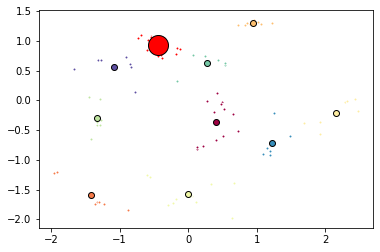

Location with most number of resturants coordinate is:  25.19645565471093 55.27738689658272


In [169]:


X_all = train_all.values

X_all = preprocessing.StandardScaler().fit(X_all).transform(X_all.astype(float))


k_means = KMeans(init = "k-means++", n_clusters = 10, n_init = 12)

k_means.fit(X_all)


k_means_labels = k_means.labels_
# print(k_means_labels)

restaurants_df["Clus"] = k_means_labels

# get the cluster with maximum number of resturants

# print(restaurants_df)

df = restaurants_df.groupby(by='Clus', as_index=False).agg({'name': pd.Series.nunique})

df = df.loc[df['name'] == df['name'].max(), 'Clus']

max_clus = df.iloc[0]

# print(max_clus)

# max_value = df.loc[df['name'] == df['name'].max(), 'Clus']

k_means_cluster_centers = k_means.cluster_centers_
# k_means_cluster_centers

fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means.labels_))))

ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means.cluster_centers_)), colors):
    my_members = (k_means.labels_ == k)
    cluster_center = k_means.cluster_centers_[k]
    
    marker_size = 20 if k==max_clus else 6
    col = col if k!=max_clus else 'red'
    ax.plot(X_all[my_members, 0], X_all[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=marker_size)
plt.show()

most_res_lat = restaurants_df.loc[restaurants_df['Clus'] == max_clus, 'lat'].mean()
most_res_lng = restaurants_df.loc[restaurants_df['Clus'] == max_clus, 'lng'].mean()

most_res_location = [most_res_lat, most_res_lng]

print('Location with most number of resturants coordinate is: ', most_res_lat, most_res_lng)


### Cluster Cafe Resturants using Coordinates

                                       name        lat        lng  Clus
0                              Saddle Dubai  25.204722  55.252573     3
1                            Alchemy Coffee  25.195002  55.244968     8
2                   Al Falamanki (الفلمنكي)  25.199752  55.239512     4
3            RX Coffee Apothecary & Kitchen  25.191058  55.236944     1
4                      Mikel Coffee Company  25.206137  55.243395     4
5                          Yamanote Atelier  25.185414  55.238833     1
6                   Urth Caffe (إيرث كافيه)  25.208221  55.263431     0
7                                     L'ETO  25.208452  55.261689     0
8   Stomping Grounds - Specialty Coffee HUB  25.223155  55.258233     2
9                  Bikers Café بايكرز كافيه  25.215692  55.250707     7
10                                     VIBE  25.185709  55.238832     1
11                             Cafe Peloton  25.186611  55.238492     1
12                          The Coffee Club  25.211020  55.25624

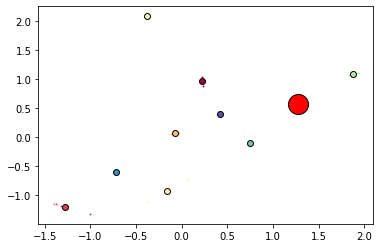

Location with minimum number of target resturants coordinate is:  25.2231549497475 55.25823259782172


In [172]:
X_target = train_target.values

X_target = preprocessing.StandardScaler().fit(X_target).transform(X_target.astype(float))


k_means_target = KMeans(init = "k-means++", n_clusters = 10, n_init = 12)

k_means_target.fit(X_target)


k_means_labels_target = k_means_target.labels_
# print(k_means_labels)

target_restaurants_df["Clus"] = k_means_labels_target

# get the cluster with maximum number of resturants

print(target_restaurants_df)

df_target = target_restaurants_df.groupby(by='Clus', as_index=False).agg({'name': pd.Series.nunique})

df_target = df_target.loc[df_target['name'] == df_target['name'].min(), 'Clus']

min_clus = df_target.iloc[0]

# print(max_clus)

# max_value = df.loc[df['name'] == df['name'].max(), 'Clus']

k_means_cluster_centers_target = k_means_target.cluster_centers_
# k_means_cluster_centers

fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_target.labels_))))

ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means_target.cluster_centers_)), colors):
    my_members = (k_means_target.labels_ == k)
    cluster_center = k_means_target.cluster_centers_[k]
    
    marker_size = 20 if k==min_clus else 6
    col = col if k!=min_clus else 'red'
    ax.plot(X_target[my_members, 0], X_target[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=marker_size)
plt.show()

min_target_lat = target_restaurants_df.loc[target_restaurants_df['Clus'] == min_clus, 'lat'].mean()
min_target_lng = target_restaurants_df.loc[target_restaurants_df['Clus'] == min_clus, 'lng'].mean()

suggested_location = [min_target_lat, min_target_lng]

print('Location with minimum number of target resturants coordinate is: ', min_target_lat, min_target_lng)

### Display the Results

In [182]:

map_lat = (most_res_location[0] + suggested_location[0])/2

map_lng = (most_res_location[1] + suggested_location[1])/2

map_latlng = [map_lat, map_lng]

map_dubai = folium.Map(location=map_latlng, zoom_start=14)
folium.Marker(most_res_location, popup='Dubai Center').add_to(map_dubai)
folium.Circle(most_res_location, radius=2000, fill=False, color='blue').add_to(map_dubai)

folium.Marker(suggested_location, popup='Dubai Center').add_to(map_dubai)
folium.Circle(suggested_location, radius=2000, fill=False, color='green').add_to(map_dubai)


map_dubai